In [2]:
%load_ext tikzmagic

# Mathematical modeling for portfolio/consumption problems.

This notebook works out some mathematical models for consumption problems.
It builds to a model of consumption over a lifespan with portfolio choice.

## Specifying models as a Markov Decision Process (MDP)

These economic problems are modeled first as a Markov Decision Process (MDP). An MDP is defined by:

* A set of states $S$. Often a state $s \in S$ will be a tuple, a member of a Cartesian product of other sets.
* A set of actions $A$
* A transition distribution $P_a(s,s') = Pr(s_{t+1} | s, a)$, where $s,s' \in S$ and $a \in A$.
    - This may be defined in terms of explicit, deterministic transition functions, in which case we'll define $T: S \times A \rightarrow S$.
* A reward function $R_a(s,s')$, the immediate reward for a transition from $s$ to $s'$ after action $a$.
* Rules that describe what the agent observes.
* Parameters that are used in the definitions of the transition and reward functions.

## Solving models

Solving a model of this kind involves finding the **policy** $\pi : A \times S \rightarrow [0,1]$ that optimizes expected utility (accumulated reward) for the agent, given that $Pr(a | s) = \pi(a,s)$.

In practice, for most of the models in this field, the optimal policy is deterministic. I will overload $\pi : S \rightarrow A$ to mean a policy that takes action $a = \pi(s)$ with probability 1 for each state $s$.

### Reinforcement learning

There are a number of generic algorithms for solving problems of this kind. These are broadly described as [*reinforcement learning*](https://en.wikiapedia.org/wiki/Reinforcement_learning). For many problems, reinforcement learning methods are not feasible.

(Note that in reinforcement learning, the discount factor ($\beta$ in HARK, $\gamma$ in [Q-learning](https://en.wikipedia.org/wiki/Q-learning), for example, is part of the policy learning algorithm, not part of the model definition per se. I will leave it out of the descriptions here.)

### Reduction to Bellman equations

For most problems in this field of inquiry, economists have found that a better path to solving problems is an analytical reduction to Bellman equations. The [Bellman equation](https://en.wikipedia.org/wiki/Bellman_equation) form of the problem is amenable to a more efficient numerical solution via dynamic programming. The HARK toolkit contains many classes that implement the dynamic programming solution to the Bellman equations for models that are significant in economics literature.

The Bellman equation is of the form, with _discount factor_ $0 < \beta < 1$:

$$V(s) = max_{a \in \Gamma(s)} [ F(s,a) + \beta V(T(s,a))]$$

This function provides the _value_, for an agent operating under the optimal policy, for each state $s$.
This can be adapted to reveal the optimal policy:

$$\pi^*(s) = argmax_{a \in \Gamma(s)} [ F(s,a) + \beta V(T(s,a))]$$

**TODO: Dealing with stochastic transitions and expectation.**

Some of the models below will be translated into Bellman equations.



## Basic Consumption Model

Starting with the a basic perfect foresight model:

### Problem definition

The **States** are:
 * $m$, market assets owned by the consumer
 * $p$, permanent labor income
 
In other words, a state in this model is a tuple $(m,p)$.
 
The **Actions** are:
 * $c$, the amount of resources consumed by the agent
     * To have a borrowing constraint, use e.g. $c \leq m$.
 
The **Transition** is:
 * $m' = R(m - c) + p$
 * $p' = Gp$
 
The **Reward** is CRRA utility:
 * $R(c, s, s') = \frac{c^{1-\rho}}{1-\rho} = U(c)$
 
The agent **observes** all states.

The **exogenous parameters** are:
 * $\rho$, risk aversion of consumer utility
 * $G$, permanent income growth factor
 * $R$, the rate of return on a riskless market asset.
 


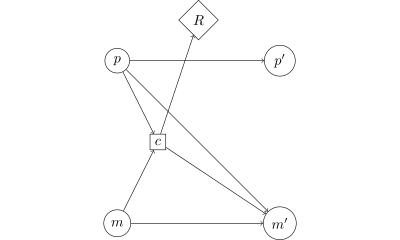

In [33]:
%%tikz -f svg
\usetikzlibrary{shapes}

\node[shape=circle,draw=black] (m) at (0,0) {$m$};
\node[shape=circle,draw=black] (p) at (0,4) {$p$};

\node[shape=rectangle,draw=black] (c) at (1,2) {$c$};

\node[shape=circle,draw=black] (m_) at (4,0) {$m'$};
\node[shape=circle,draw=black] (p_) at (4,4) {$p'$};

\node[shape=diamond,draw=black] (R) at (2,5) {$R$};

\path [->] (m) edge node[left] {} (c);
\path [->] (p) edge node[left] {} (c);

\path [->] (c) edge node[left] {} (R);
                                              
\path [->] (m) edge node[left] {} (m_);
\path [->] (c) edge node[left] {} (m_);
\path [->] (p) edge node[left] {} (m_);
                                              
\path [->] (p) edge node[left] {} (p_);
 

### Bellman equation
 
The Bellman equation for this model is:
 
$$V(m,p) = R((c),m,p) + \beta V(m',p') = U(c) + \beta V(m',p')$$

## Introducing Death

The model in the previous section is not quite the same one as in the Perfect Foresight Model because it does not include the probability $\mathsf{D}$ of agent death.

To accomodate this, perform the following updates to the earlier model.

A new **state**, $d \in \{0,1\}$, for whether or not the consumer is dead. $S : M \times P \times D$

A new **transition**. The agent, if alive, dies with probability $d$:
 * $P(d' = 1 | d = 0) = \mathsf{D}$
 * $P(d' = 0 | d = 0) = 1 - \mathsf{D}$
 * $P(d' = 1 | d = 1) = 1$
 
A new **reward**: CRRA utility when alive, zero when dead.
 * $R(c, (\cdot, \cdot, d), \cdot) = (1 - d) \frac{c^{1-\rho}}{1-\rho} = (1 - d)U(c)$, 
 
A new **exogenous paramater**, $\mathsf{D}$, the chance of death each turn.

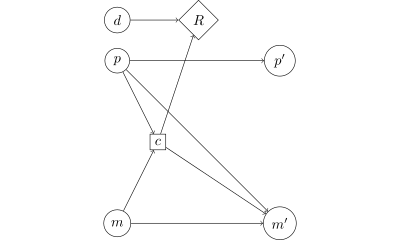

In [32]:
%%tikz -f svg
\usetikzlibrary{shapes}

\node[shape=circle,draw=black] (d) at (0,5) {$d$};

\node[shape=circle,draw=black] (m) at (0,0) {$m$};
\node[shape=circle,draw=black] (p) at (0,4) {$p$};

\node[shape=rectangle,draw=black] (c) at (1,2) {$c$};

\node[shape=circle,draw=black] (m_) at (4,0) {$m'$};
\node[shape=circle,draw=black] (p_) at (4,4) {$p'$};

\node[shape=diamond,draw=black] (R) at (2,5) {$R$};

\path [->] (m) edge node[left] {} (c);
\path [->] (p) edge node[left] {} (c);

\path [->] (c) edge node[left] {} (R);
\path [->] (d) edge node[left] {} (R);
                                              
\path [->] (m) edge node[left] {} (m_);
\path [->] (c) edge node[left] {} (m_);
\path [->] (p) edge node[left] {} (m_);
                                              
\path [->] (p) edge node[left] {} (p_);

### Bellman equation
 
The Bellman equation for this model is:

\begin{eqnarray*}
V(m,p,d) &=& R(c, (m,p,d), (m',p',d')) + \beta E [V(m',p',d)] \\
         &=& (1 - d)U(c) + \beta E [V(m',p',d)]
\end{eqnarray*}

Because death, at probability $\mathsf{D}$, ends all future utility, this can be simplified to:

\begin{eqnarray*}
V(m,p,d) &=& \begin{cases}
  U(c) + \beta (1 - \mathsf{D}) E [V(m',p',0)], & \text{if } d = 0\\
  0, & \text{otherwise}
\end{cases}
\end{eqnarray*}

## Introducing Portfolio Choice

In this variation, the consumer has a choice of two different market assets.
One is a riskless market asset with return $R_f$, the other is a risky market asset with return $R_t$.

In this model, the following elements are introduced and/or replaced:

An **action** $\alpha \in [0,1]$.

The **transition**:

* $m' = (\alpha R_t + (1 - \alpha) R_f) (m - c) + p$
    * where $R_t = \bar{R}_f + \mu + \eta_t$
    * with $\eta_t \sim \mathcal{N}(0, \sigma^2_\eta)$

The **exogenous parameters**:
* $\mu$ a return premium on the riskier asset
* $\sigma_\eta$, standard deviation of stock returns

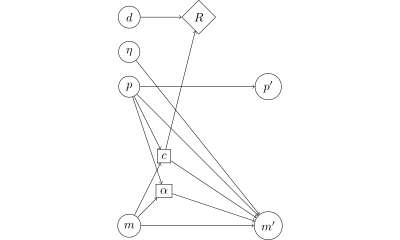

In [42]:
%%tikz -f svg
\usetikzlibrary{shapes}

\node[shape=circle,draw=black] (eta) at (0,5) {$\eta$};
\node[shape=circle,draw=black] (d) at (0,6) {$d$};

\node[shape=circle,draw=black] (m) at (0,0) {$m$};
\node[shape=circle,draw=black] (p) at (0,4) {$p$};

\node[shape=rectangle,draw=black] (c) at (1,2) {$c$};
\node[shape=rectangle,draw=black] (alpha) at (1,1) {$\alpha$};

\node[shape=circle,draw=black] (m_) at (4,0) {$m'$};
\node[shape=circle,draw=black] (p_) at (4,4) {$p'$};

\node[shape=diamond,draw=black] (R) at (2,6) {$R$};

\path [->] (m) edge node[left] {} (c);
\path [->] (p) edge node[left] {} (c);
                                              
\path [->] (m) edge node[left] {} (alpha);
\path [->] (p) edge node[left] {} (alpha);

\path [->] (c) edge node[left] {} (R);
\path [->] (d) edge node[left] {} (R);
                                              
\path [->] (m) edge node[left] {} (m_);
\path [->] (c) edge node[left] {} (m_);
\path [->] (p) edge node[left] {} (m_);
\path [->] (alpha) edge node[left] {} (m_);
\path [->] (eta) edge node[left] {} (m_);
                                              
\path [->] (p) edge node[left] {} (p_);

## Introducing Stock Market Participation Fee

How can we add a cost $k$, which is a one-time cost to being able to enter the riskier/higher return market asset class?

An **action**, $\iota \in \{0,1\}$, a decision to begin investing in the higher asset class.

A **state**, $\bar\iota \in \{0,1\}$, denoting that the consumer has made the decision to invest in the higher asset class.

The **transition**:

* $m' = (\bar\iota \alpha R_t + (1 - \alpha) R_f) (m - c) + p - k\iota$
    * where $R_t = R_t = \bar{R}_f + \mu + \eta_t$
    * with $\eta_t \sim \mathcal{N}(0, \sigma^2_\eta)$
* $\bar\iota' = \bar\iota \land \iota $

Note that the implication here is that if the consumer has not entered the higher asset class market, then any decision to invest in the higher asset class is voided. In an optimal policy, the consumer will never choose to allocate assets in this way. This restriction could be modeled differently; I've chosen this one for cleanliness.

New **exogenous parameter**:
 * $k$ is the cost to entire the higher asset market

## Adding Finitude - TODO

In all the models so far, there has been discrete time, but every stage in time is identical.

In some models, it is important to model changes over time, such as years over a span of a person's life.
This section will show how to model an increasing chance of dying over time.

A **state**, $t \in \mathbb{N}^0$, for each period of time.

A replacement **transition**. The agent, if alive, dies with probability $d$:
 * $P(d' = 1 | d = 0) = \mathsf{D}(t)$
 * $P(d' = 0 | d = 0) = 1 - \mathsf{D}(t)$
 * $P(d' = 1 | d = 1) = 1$
 
But now, instead of having 
 
In the simplest version of this, the death probability **paramater**, $\mathsf{D}$, the chance of death each turn.

**TODO**: New state variable $t$.